# Final Group Project NLP - Part 4

* Ahmed Mohamed Elghamry Shehata
* Ahmed Mahmoud Abdelmoneim Abdelhamid
* Noureldin Mohamed Abdelsalm Mohamed Hamedo
* Sergio Rodrigo Fernandez Testa

# Categorizer

## Install dependencies

In [ ]:
!pip install transformers datasets scikit-learn pandas torch
!pip install -U accelerate
!pip install matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 48.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
!zip -r "/content/drive/MyDrive/NLP_data.zip" "/content/drive/MyDrive/NLP data"

  adding: content/drive/MyDrive/NLP data/ (stored 0%)
  adding: content/drive/MyDrive/NLP data/recipe_classifier/ (stored 0%)
  adding: content/drive/MyDrive/NLP data/recipe_classifier/tokenizer_config.json (deflated 75%)
  adding: content/drive/MyDrive/NLP data/recipe_classifier/special_tokens_map.json (deflated 42%)
  adding: content/drive/MyDrive/NLP data/recipe_classifier/vocab.txt (deflated 53%)
  adding: content/drive/MyDrive/NLP data/Clustered_dataset.csv (deflated 72%)
  adding: content/drive/MyDrive/NLP data/test_encodings.pkl (deflated 94%)
  adding: content/drive/MyDrive/NLP data/train_encodings.pkl (deflated 94%)
  adding: content/drive/MyDrive/NLP data/test_labels.csv (deflated 91%)
  adding: content/drive/MyDrive/NLP data/train_labels.csv (deflated 91%)


In [ ]:
!gdown 1lnoaa6tE2gGDQEEz0DW2hvOnjIMK9oTo

Downloading...
From (original): https://drive.google.com/uc?id=1lnoaa6tE2gGDQEEz0DW2hvOnjIMK9oTo
From (redirected): https://drive.google.com/uc?id=1lnoaa6tE2gGDQEEz0DW2hvOnjIMK9oTo&confirm=t&uuid=89ea8081-5be5-4024-b852-a6e1cc9d64f4
To: /content/receipeData.zip
100% 621M/621M [00:08<00:00, 74.8MB/s]


In [ ]:
!unzip /content/receipeData.zip

Archive:  /content/receipeData.zip
   creating: dataset/
  inflating: dataset/full_dataset.csv  


In [ ]:
import pandas as pd
import re
import ast

In [ ]:
df=pd.read_csv("/content/dataset/full_dataset.csv", index_col=0)
df = df.dropna()
df

,title,ingredients,directions,link,source,NER
0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu..."
1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom..."
2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar..."
3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo..."
4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu..."
...,...,...,...,...,...,...
2231137,Sunny's Fake Crepes,"[""1/2 cup chocolate hazelnut spread (recommend...","[""Spread hazelnut spread on 1 side of each tor...",www.foodnetwork.com/recipes/sunny-anderson/sun...,Recipes1M,"[""chocolate hazelnut spread"", ""tortillas"", ""bu..."
2231138,Devil Eggs,"[""1 dozen eggs"", ""1 paprika"", ""1 salt and pepp...","[""Boil eggs on medium for 30mins."", ""Then cool...",cookpad.com/us/recipes/355411-devil-eggs,Recipes1M,"[""eggs"", ""paprika"", ""salt"", ""choice"", ""miracle..."
2231139,Extremely Easy and Quick - Namul Daikon Salad,"[""150 grams Daikon radish"", ""1 tbsp Sesame oil...","[""Julienne the daikon and squeeze out the exce...",cookpad.com/us/recipes/153324-extremely-easy-a...,Recipes1M,"[""radish"", ""Sesame oil"", ""White sesame seeds"",..."
2231140,Pan-Roasted Pork Chops With Apple Fritters,"[""1 cup apple cider"", ""6 tablespoons sugar"", ""...","[""In a large bowl, mix the apple cider with 4 ...",cooking.nytimes.com/recipes/1015164,Recipes1M,"[""apple cider"", ""sugar"", ""kosher salt"", ""bay l..."


## Create dataset

### Vectorize data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize ingredient text
vectorizer = TfidfVectorizer(max_features=20000)
X = vectorizer.fit_transform(df["NER"])

### Define Helper for Training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

def train_and_evaluate_classifier(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1, stratify=y, test_size=0.005, random_state=42)
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="macro")
    return acc, f1


### Loop over different # of clusters

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

results = []
ks = list(range(2, 11))  # From k=3 to k=10

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    acc, f1 = train_and_evaluate_classifier(X, cluster_labels)
    results.append({"k": k, "accuracy": acc, "f1_score": f1})
    print(f"k={k}: Accuracy={acc:.3f}, F1 Score={f1:.3f}")


k=2: Accuracy=0.997, F1 Score=0.996
k=3: Accuracy=0.992, F1 Score=0.990
k=4: Accuracy=0.991, F1 Score=0.991
k=5: Accuracy=0.986, F1 Score=0.986
k=6: Accuracy=0.985, F1 Score=0.985
k=7: Accuracy=0.980, F1 Score=0.981
k=8: Accuracy=0.980, F1 Score=0.980
k=9: Accuracy=0.977, F1 Score=0.976
k=10: Accuracy=0.980, F1 Score=0.980


### Plot results

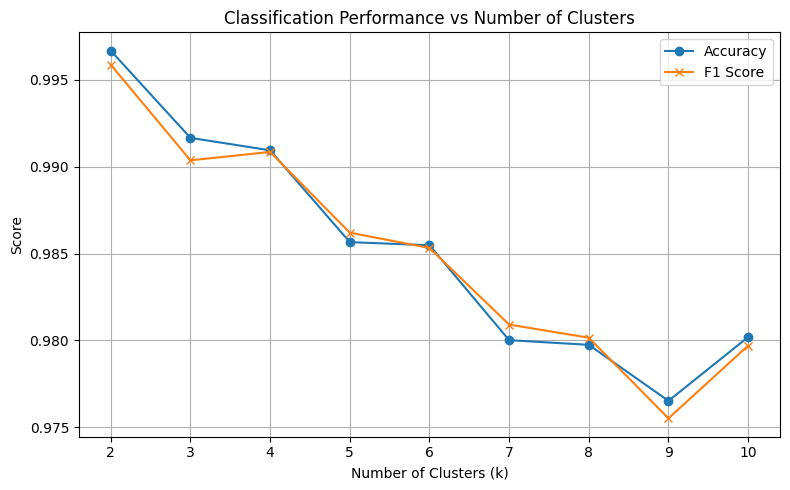

In [ ]:
import matplotlib.pyplot as plt

ks = [r["k"] for r in results]
accuracies = [r["accuracy"] for r in results]
f1_scores = [r["f1_score"] for r in results]

plt.figure(figsize=(8, 5))
plt.plot(ks, accuracies, marker="o", label="Accuracy")
plt.plot(ks, f1_scores, marker="x", label="F1 Score")
plt.title("Classification Performance vs Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Analyze best clusters

In [ ]:
best_k = 2
kmeans = KMeans(n_clusters=best_k, random_state=42)
df["cluster"] = kmeans.fit_predict(X)

# Preview example titles per cluster
for cluster_id in range(best_k):
    print(f"\nCluster {cluster_id}")
    print(df[df["cluster"] == cluster_id]["title"].head(10).to_string(index=False))



Cluster 0
                               No-Bake Nut Cookies
                              Reeses Cups(Candy)  
                               Rhubarb Coffee Cake
                                     Buckeye Candy
                  Eggless Milkless Applesauce Cake
Grandma Hanrath'S Banana Breadfort Collins, Col...
                                        Easy Fudge
                                    One Hour Rolls
                   Quick Coffee Cake(6 Servings)  
                                    Angel Biscuits

Cluster 1
   Jewell Ball'S Chicken
             Creamy Corn
           Chicken Funny
Cheeseburger Potato Soup
          Scalloped Corn
    Nolan'S Pepper Steak
         Millionaire Pie
   Double Cherry Delight
    Quick Barbecue Wings
     Taco Salad Chip Dip


### Add categories

In [ ]:
cluster_names = {
    0: "Sweet",
    1: "Sour",
}

df["cluster_name"] = df["cluster"].map(cluster_names)

In [ ]:
print(df["cluster_name"].value_counts())

cluster_name
Sour     1609039
Sweet     622102
Name: count, dtype: int64


### Change column names

In [ ]:
df

,title,ingredients,directions,link,source,NER,cluster,cluster_name
0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu...",0,Sweet
1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom...",1,Sour
2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar...",1,Sour
3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo...",1,Sour
4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu...",0,Sweet
...,...,...,...,...,...,...,...,...
2231137,Sunny's Fake Crepes,"[""1/2 cup chocolate hazelnut spread (recommend...","[""Spread hazelnut spread on 1 side of each tor...",www.foodnetwork.com/recipes/sunny-anderson/sun...,Recipes1M,"[""chocolate hazelnut spread"", ""tortillas"", ""bu...",1,Sour
2231138,Devil Eggs,"[""1 dozen eggs"", ""1 paprika"", ""1 salt and pepp...","[""Boil eggs on medium for 30mins."", ""Then cool...",cookpad.com/us/recipes/355411-devil-eggs,Recipes1M,"[""eggs"", ""paprika"", ""salt"", ""choice"", ""miracle...",1,Sour
2231139,Extremely Easy and Quick - Namul Daikon Salad,"[""150 grams Daikon radish"", ""1 tbsp Sesame oil...","[""Julienne the daikon and squeeze out the exce...",cookpad.com/us/recipes/153324-extremely-easy-a...,Recipes1M,"[""radish"", ""Sesame oil"", ""White sesame seeds"",...",1,Sour
2231140,Pan-Roasted Pork Chops With Apple Fritters,"[""1 cup apple cider"", ""6 tablespoons sugar"", ""...","[""In a large bowl, mix the apple cider with 4 ...",cooking.nytimes.com/recipes/1015164,Recipes1M,"[""apple cider"", ""sugar"", ""kosher salt"", ""bay l...",1,Sour


## Tokenize data

In [ ]:
from transformers import DistilBertTokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
df["encoded_label"] = label_encoder.fit_transform(df["cluster_name"])

# Split data
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df["NER"].tolist(),
    df["encoded_label"].tolist(),
    test_size=0.2,
    random_state=42
)

# Load tokenizer
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

# Tokenize
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
pd.DataFrame(train_labels, columns=["label"]).to_csv("train_labels.csv", index=False)
pd.DataFrame(test_labels, columns=["label"]).to_csv("test_labels.csv", index=False)

In [ ]:
import pickle

with open("train_encodings.pkl", "wb") as f:
    pickle.dump(train_encodings, f)

with open("test_encodings.pkl", "wb") as f:
    pickle.dump(test_encodings, f)


In [ ]:
tokenizer.save_pretrained("results/recipe_classifier")